In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('Advertising.csv')

In [4]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
data = data.drop(columns=['Unnamed: 0'])

In [15]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
data.duplicated().sum()

0

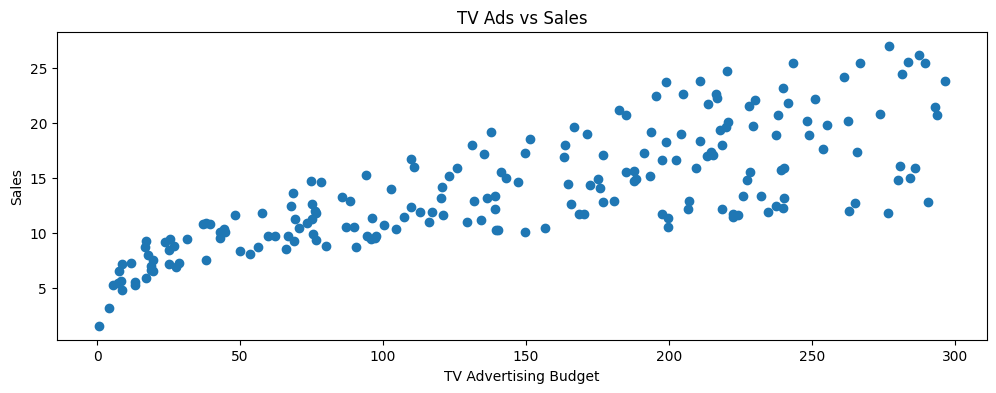

In [24]:
plt.figure(figsize = (12,6))
plt.scatter(data['TV'], data['Sales'])
plt.title('TV Ads vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()




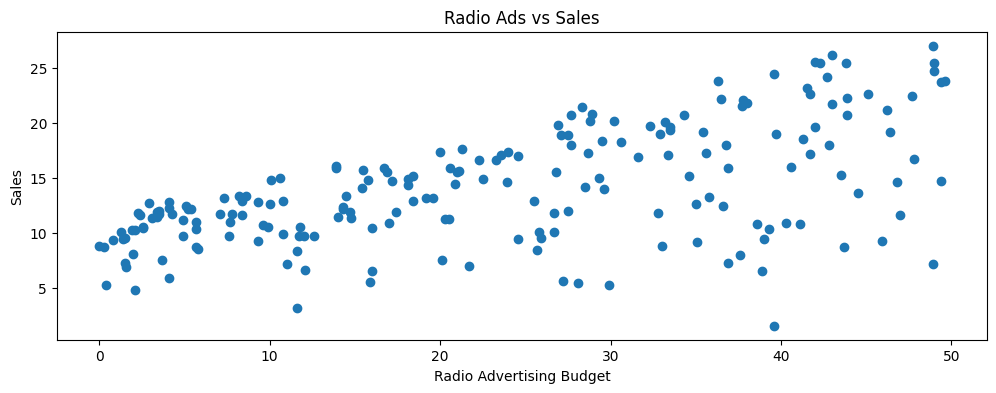

In [25]:
plt.figure(figsize = (12,6))
plt.scatter(data['Radio'], data['Sales'])
plt.title('Radio Ads vs Sales')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.show()

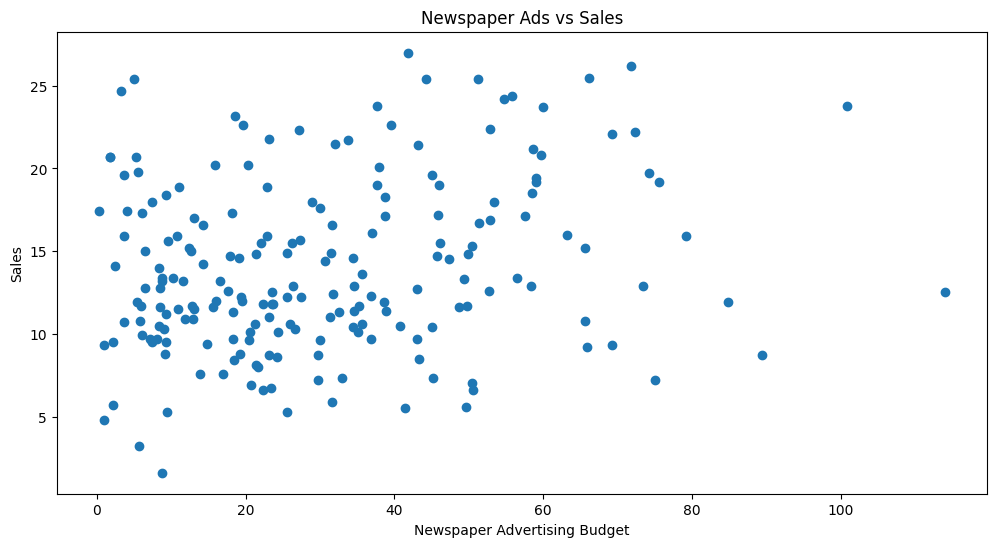

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(data['Newspaper'], data['Sales'])
plt.title('Newspaper Ads vs Sales')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.show()

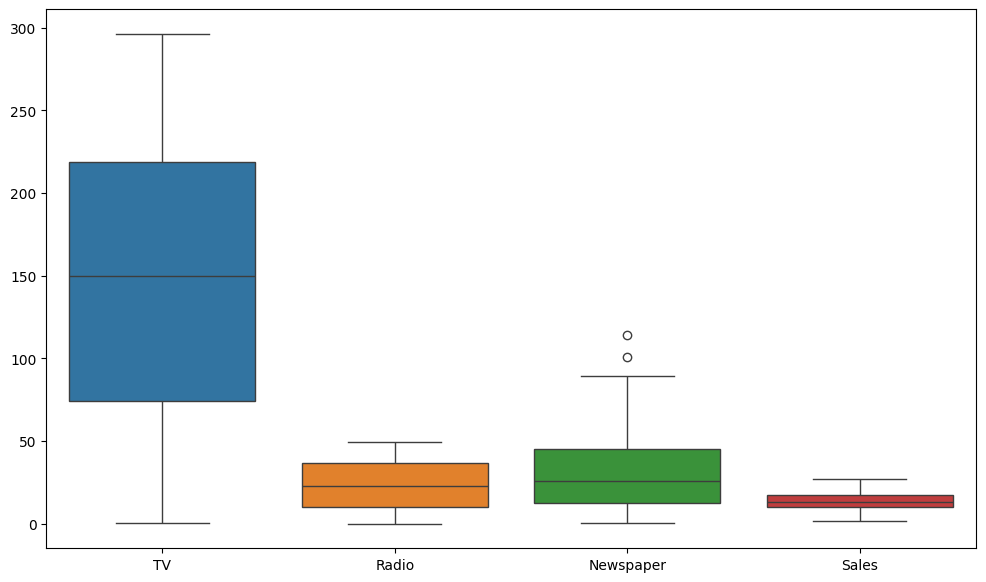

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(data = data)
plt.show()

In [54]:
from scipy.stats.mstats import winsorize

In [57]:
column_to_winsorize = 'Newspaper'
data[column_to_winsorize] = winsorize(data[column_to_winsorize], limits = (0.05,0.05))

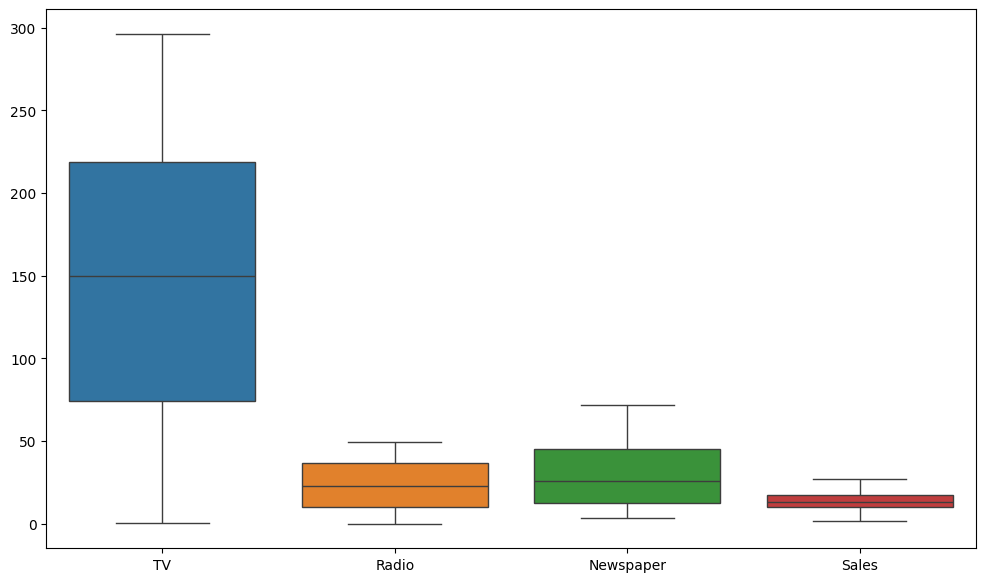

In [58]:
plt.figure(figsize = (12,7))
sns.boxplot(data = data)
plt.show()

In [31]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

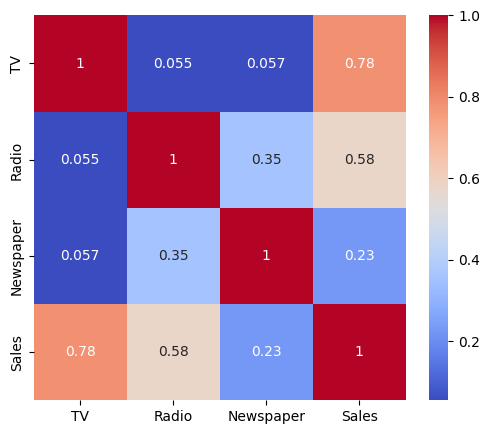

In [32]:
corr = data.corr() 
fig, ax = plt.subplots(figsize = (6,5))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'coolwarm')

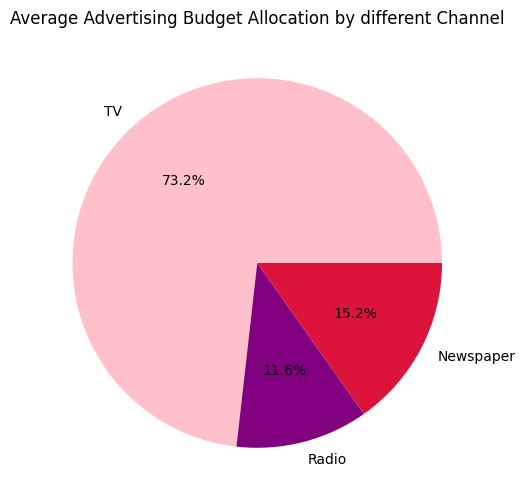

In [35]:
average_budget = data[['TV', 'Radio', 'Newspaper']].mean()
plt.figure(figsize=(8, 6))
plt.pie(average_budget, labels=average_budget.index, autopct='%1.1f%%', colors=['pink', 'purple', 'crimson'])
plt.title('Average Advertising Budget Allocation by different Channel')
plt.show()

In [36]:
x = data.drop(columns = ['Sales'])

In [37]:
y = data['Sales']

In [38]:
from  sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state = 42)

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_predictor = lin_reg.predict(x_test)
pd.DataFrame({'Actual_y' :y_test, 'Predicted_y':y_predictor})

,Actual_y,Predicted_y
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [62]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predictor, squared = False)
MSE

C:\Users\jgoos\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.9485372043446383

In [63]:
RMSE = np.sqrt(MSE)
RMSE

1.3959001412510275

In [64]:
from sklearn.metrics import mean_absolute_error

In [65]:
MAE = mean_absolute_error(y_test, y_predictor)
MAE

1.5116692224549089

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score = r2_score(y_test, y_predictor)
print("R^2:", r2_score)

R^2: 0.8609466508230368


<Axes: title={'center': 'Actual vs Predicted Values'}, xlabel='Sales', ylabel='Predicted Value'>

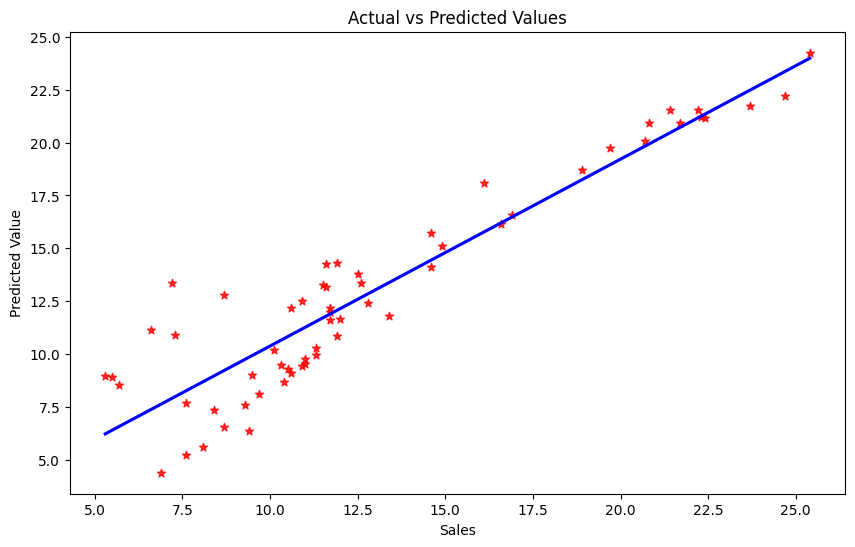

In [70]:
plt.figure(figsize=(10,6))
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
sns.regplot(x = y_test, y = y_predictor, ci = None, color = 'Red', marker = "*", line_kws = {"color":"Blue"}) 